In [1]:
import numpy as np
from scipy import stats 
import pandas as pd
from tqdm import tqdm_notebook
import cdpm
import pandas_datareader as pd_reader
from sklearn.preprocessing import add_dummy_feature
import cdpm
import matplotlib as mpl
from multiprocessing import Pool
from bayesiankalman import mcmc
import seaborn as sns

/home/sangrey/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline
mpl.style.use('seaborn-talk')
np.set_printoptions(precision=3, suppress=True)

In [3]:
var_filename = '../results/daily_var_estimate.tmp.hdf'

In [4]:
cdpm.__version__

'0.01.32-py36_2'

## Switch to the cdpm-based var estimator

In [5]:
results = cdpm.read_results(var_filename)
comp_cov_draws = results['comp_cov']
beta_draws = results['beta']
data = results['data']
regressor = results['regressor']
regressand = results['regressand']
regressand_dim = regressand.shape[1]
time_dim = regressor.shape[0]

In [6]:
comp_cov_draws.shape

(5000, 11, 11)

(0.0075, 0.01)

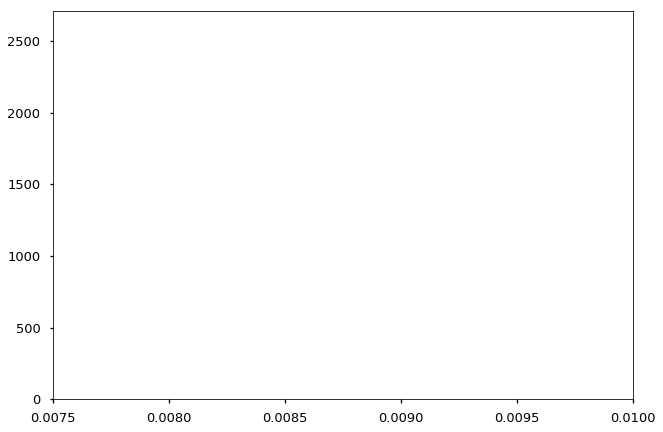

In [7]:
comp_cov_fig, comp_cov_ax = mpl.pyplot.subplots()
sns.distplot(comp_cov_draws[:,0,0], ax=comp_cov_ax)
comp_cov_ax.set_xlim([0.0075, 0.01])

In [8]:
np.mean(beta_draws, axis=0)

array([[-0.001,  0.   , -0.   ,  0.   ,  0.001, -0.   , -0.001,  0.   ,
         0.   , -0.   , -0.001],
       [ 0.992, -0.019,  0.   ,  0.01 , -0.025, -0.012, -0.01 , -0.035,
        -0.019,  0.073,  0.17 ],
       [-0.002, -0.067,  0.224,  0.01 , -0.043,  0.02 ,  0.002, -0.072,
         0.009, -0.006,  0.009],
       [ 0.001,  0.007, -0.059, -0.001,  0.046,  0.022,  0.006,  0.056,
         0.014,  0.025,  0.015],
       [-0.003, -0.052, -0.058,  0.965, -0.04 ,  0.001, -0.038, -0.016,
         0.431,  0.386,  0.232],
       [ 0.003,  0.039,  0.081, -0.005, -0.116,  0.021,  0.039, -0.032,
         0.008,  0.031,  0.024],
       [ 0.   ,  0.009, -0.002,  0.005, -0.049, -0.101,  0.012, -0.054,
        -0.003,  0.015,  0.015],
       [ 0.001,  0.036, -0.066, -0.005, -0.093, -0.013,  0.956, -0.05 ,
         0.044,  0.047,  0.005],
       [-0.006,  0.06 , -0.147,  0.011, -0.027, -0.035, -0.004, -0.03 ,
        -0.016, -0.066, -0.063],
       [-0.002, -0.004, -0.034,  0.01 ,  0.015, -0.003,

In [9]:
np.mean(comp_cov_draws, axis=0)

array([[ 0.006,  0.013,  0.001, -0.003,  0.009,  0.005,  0.002,  0.014,
        -0.002, -0.001, -0.   ],
       [ 0.013,  0.986,  0.124, -0.038,  0.22 ,  0.07 ,  0.039,  0.23 ,
        -0.025, -0.046, -0.042],
       [ 0.001,  0.124,  0.949, -0.001,  0.017, -0.011,  0.015, -0.007,
        -0.008, -0.014,  0.003],
       [-0.003, -0.038, -0.001,  0.033, -0.084, -0.05 , -0.005, -0.102,
         0.023,  0.024,  0.016],
       [ 0.009,  0.22 ,  0.017, -0.084,  0.959,  0.56 ,  0.048,  0.845,
        -0.038, -0.049, -0.046],
       [ 0.005,  0.07 , -0.011, -0.05 ,  0.56 ,  0.988,  0.033,  0.634,
        -0.011, -0.015, -0.011],
       [ 0.002,  0.039,  0.015, -0.005,  0.048,  0.033,  0.048,  0.053,
        -0.002, -0.003, -0.003],
       [ 0.014,  0.23 , -0.007, -0.102,  0.845,  0.634,  0.053,  0.978,
        -0.049, -0.06 , -0.048],
       [-0.002, -0.025, -0.008,  0.023, -0.038, -0.011, -0.002, -0.049,
         0.274,  0.134,  0.078],
       [-0.001, -0.046, -0.014,  0.024, -0.049, -0.015,

In [10]:
forecast = cdpm.forecast_var(regressor, beta_draws, comp_cov_draws, progress_bar=tqdm_notebook)

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

In [11]:
percentiles = [1,5, 25, 50, 75, 95, 99]

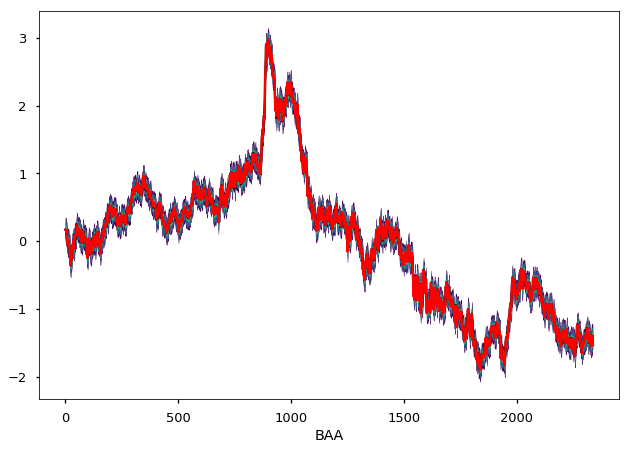

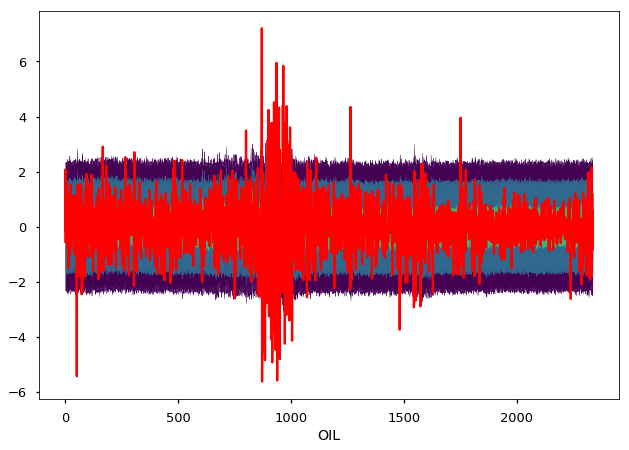

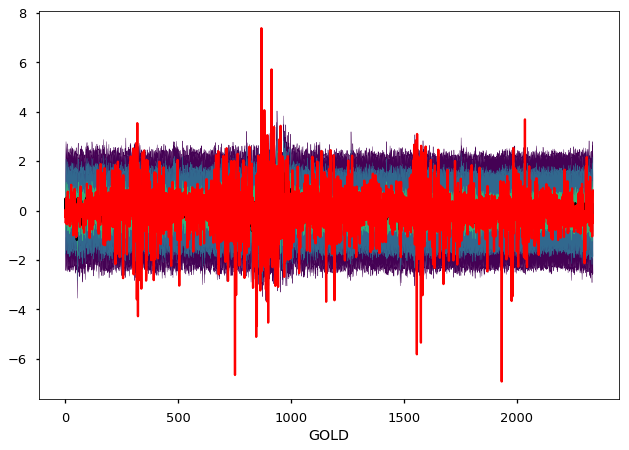

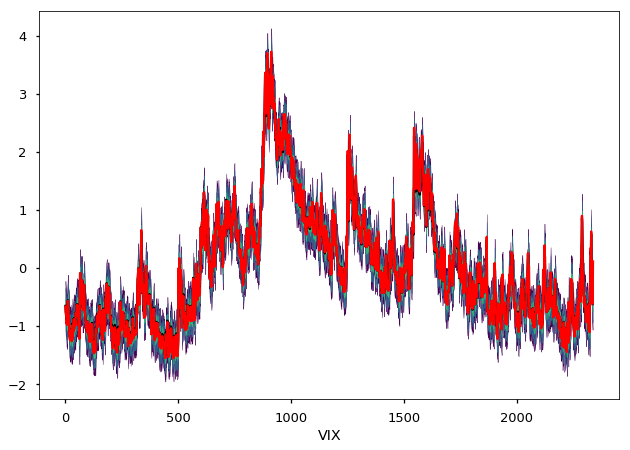

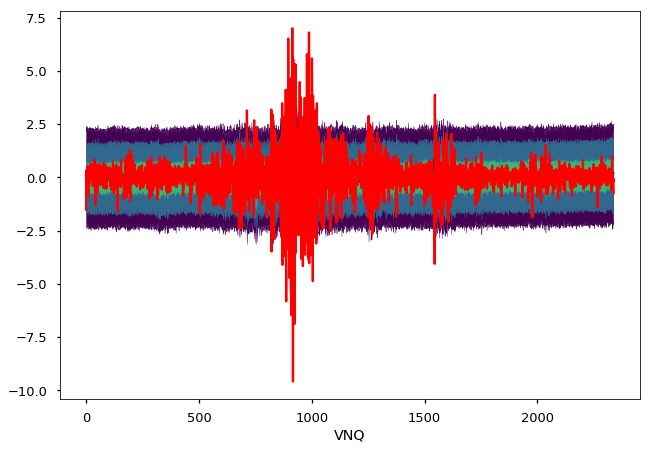

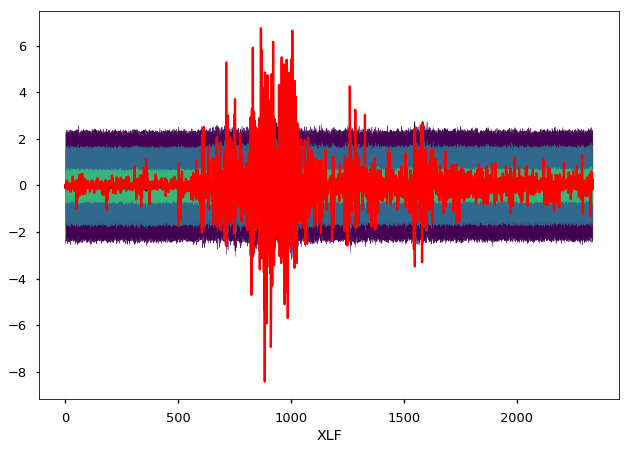

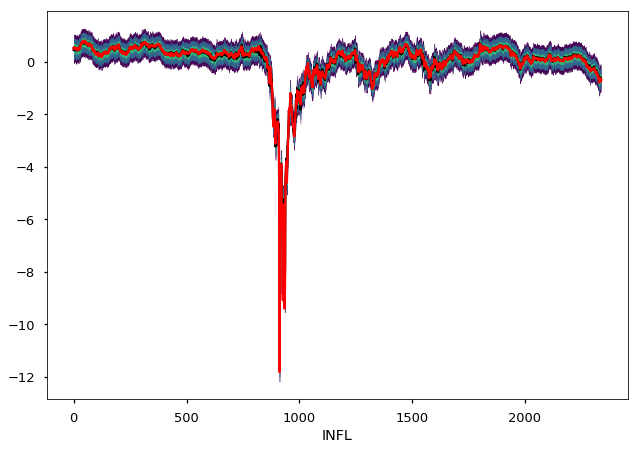

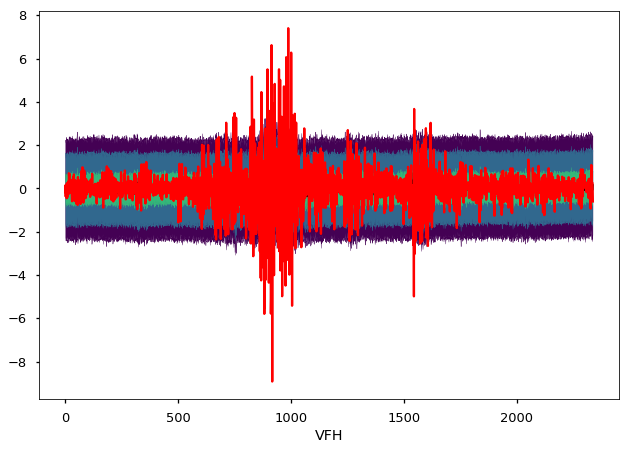

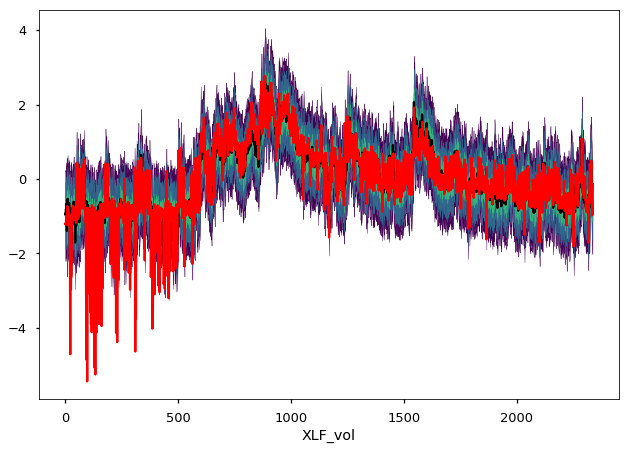

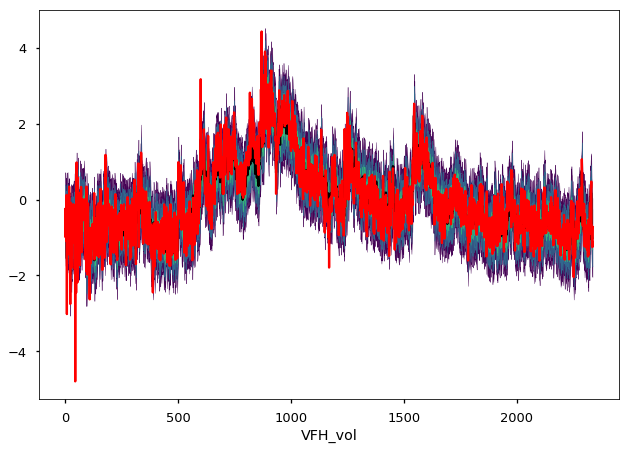

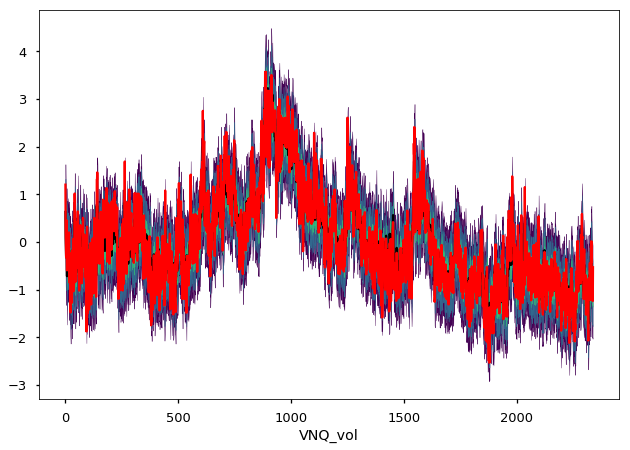

In [12]:
for idx, val in enumerate(regressand.columns):
    data_comparison_fig, data_comparison_ax = mpl.pyplot.subplots(1,1)
    mcmc.fan_plot(data_comparison_ax, pd.DataFrame(forecast[:,:,idx].T), percentiles, color='black')
    data_comparison_ax.plot(data[val].values, color='red')
    data_comparison_ax.set_xlabel(val)
    data_comparison_fig.savefig(f'../doc/figures/{val}_forecasts.tmp.pdf', transparent=True,frameone=False,
                               bbox_inches='tight', pad_inches=0)

/home/sangrey/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


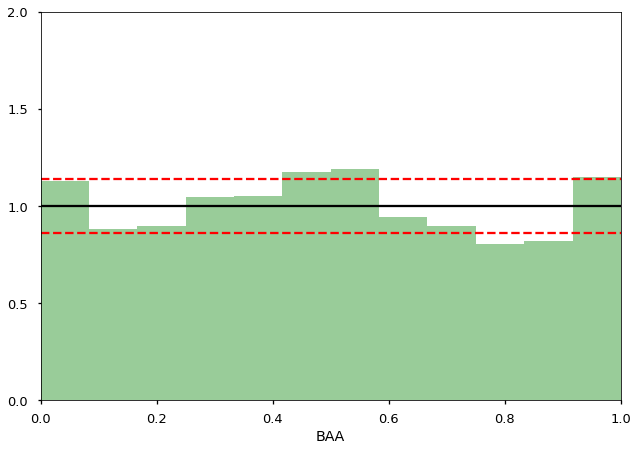

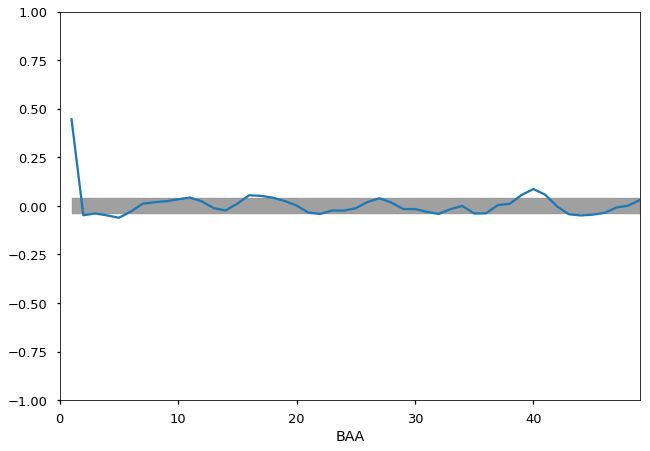

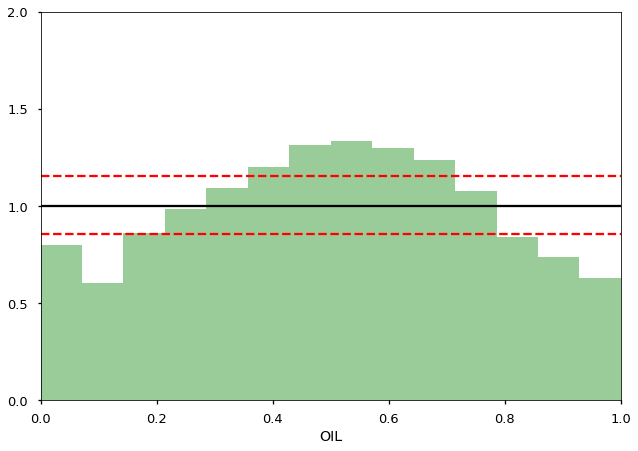

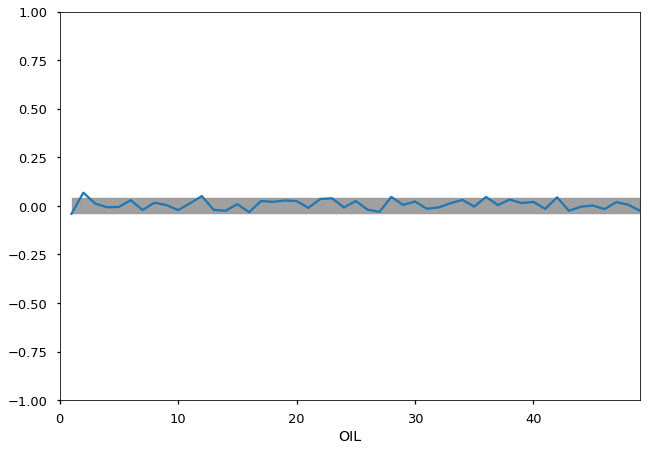

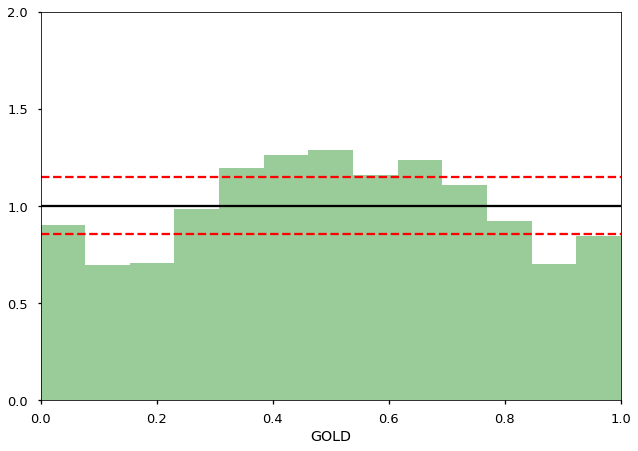

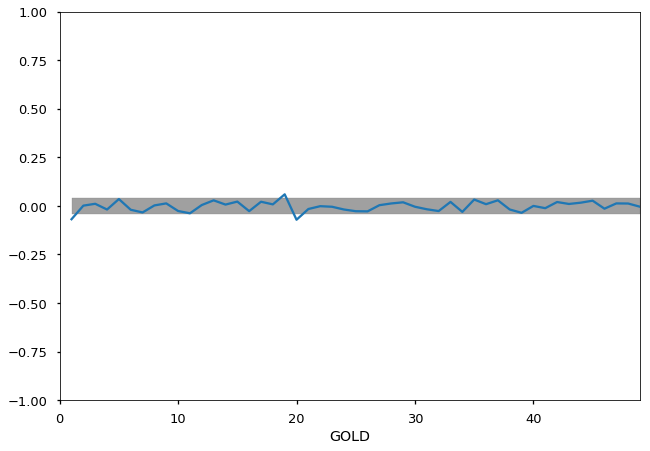

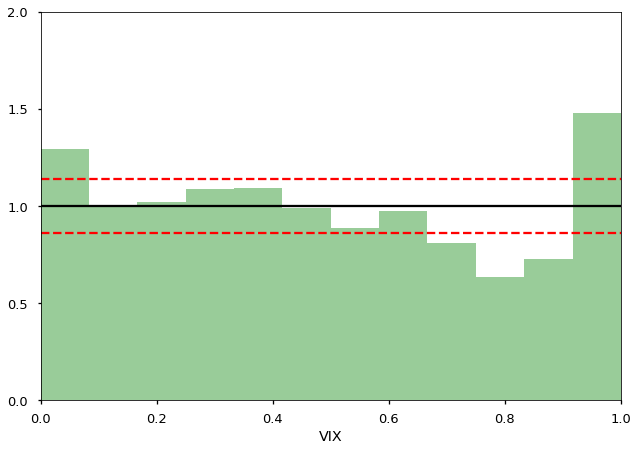

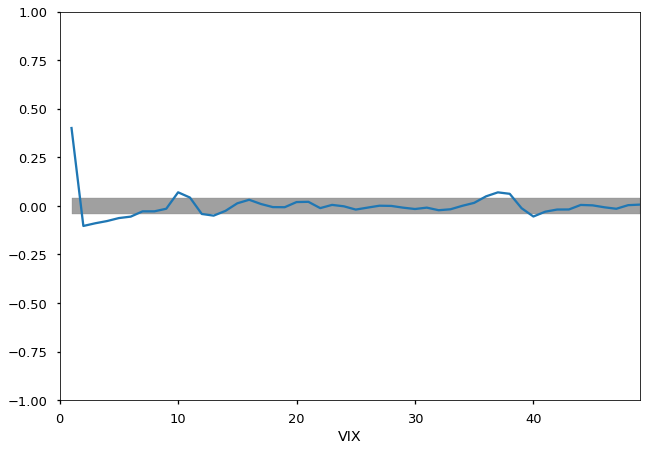

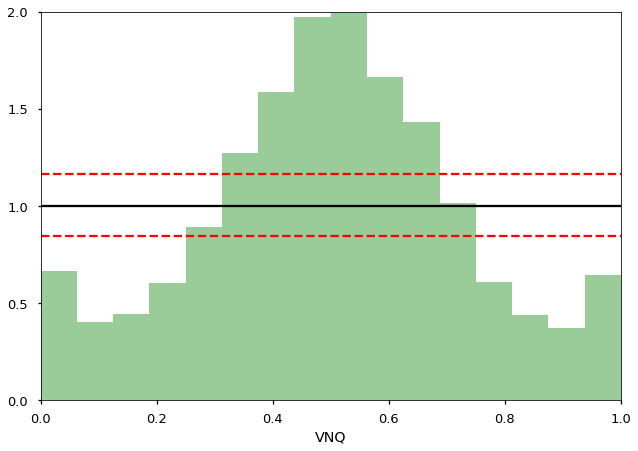

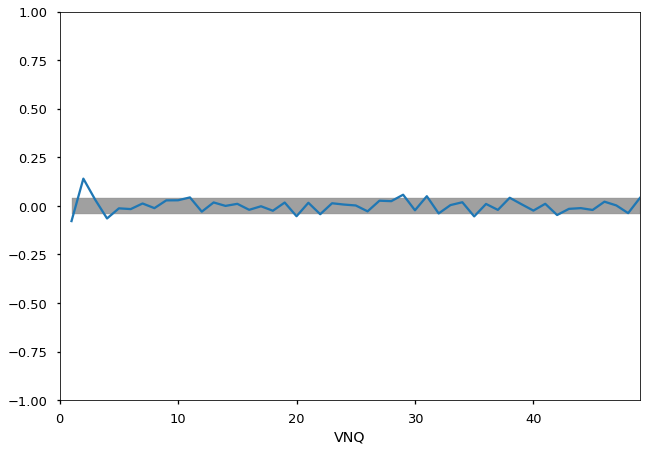

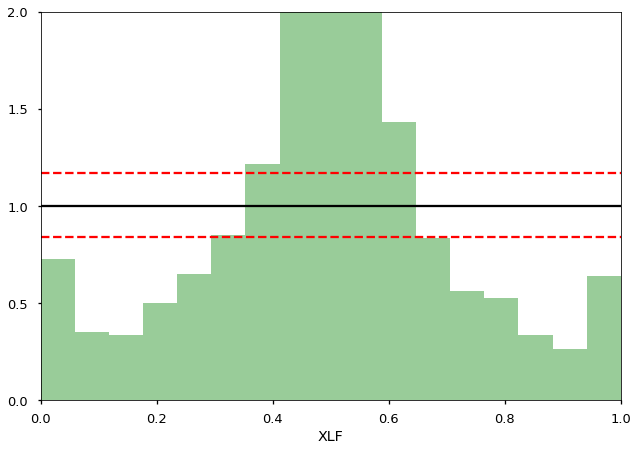

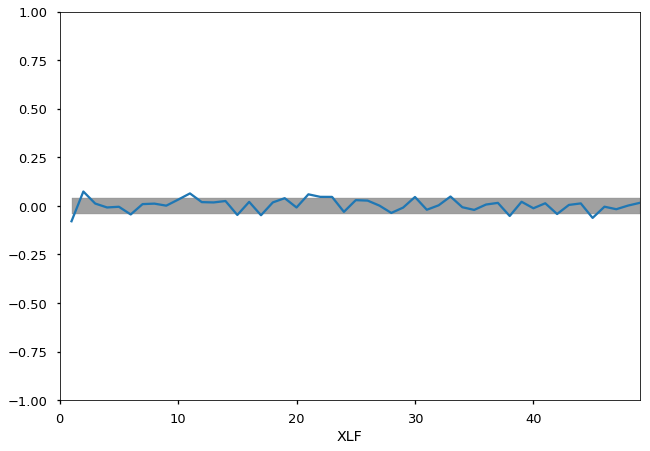

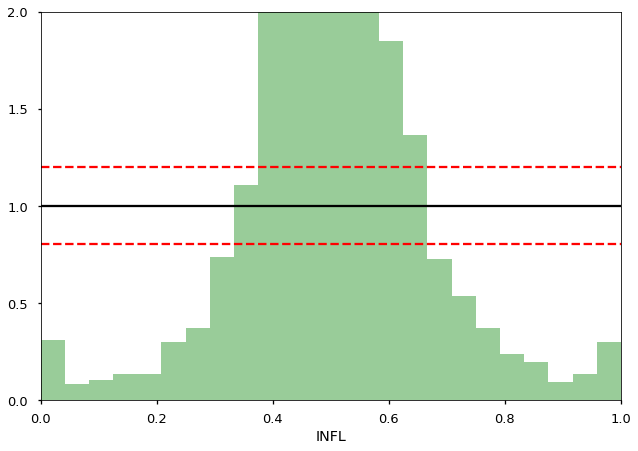

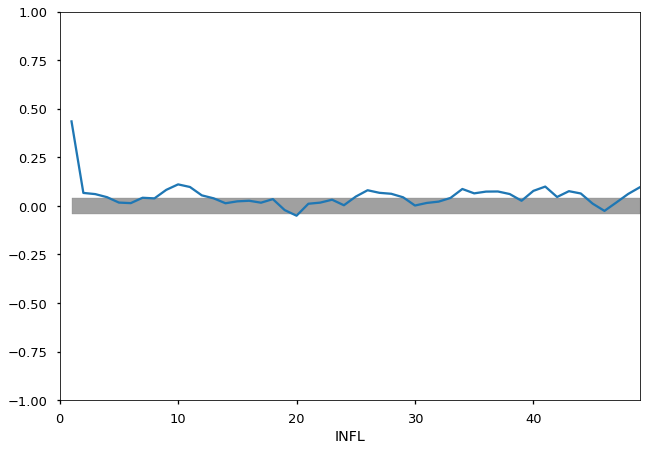

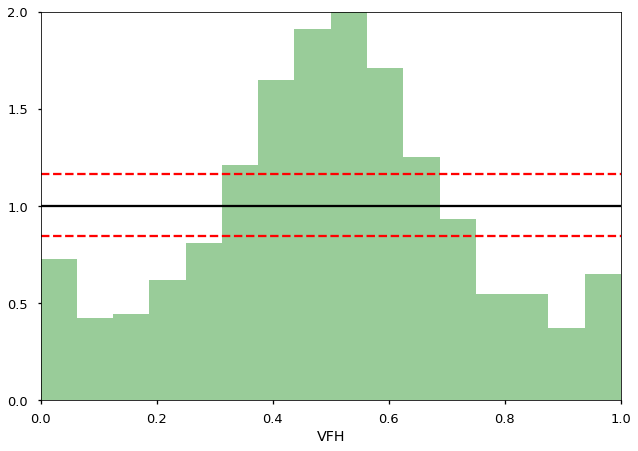

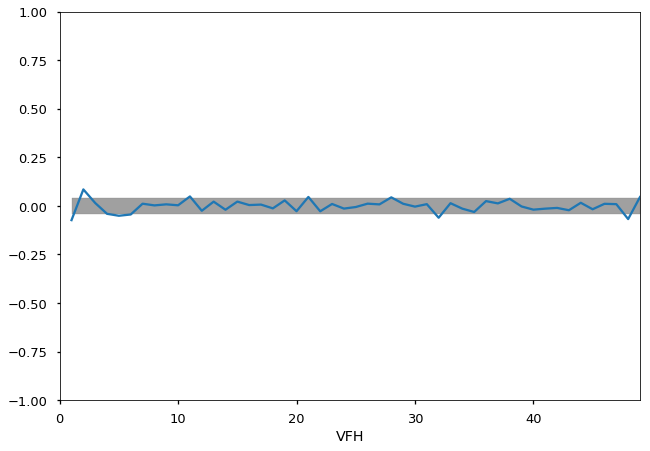

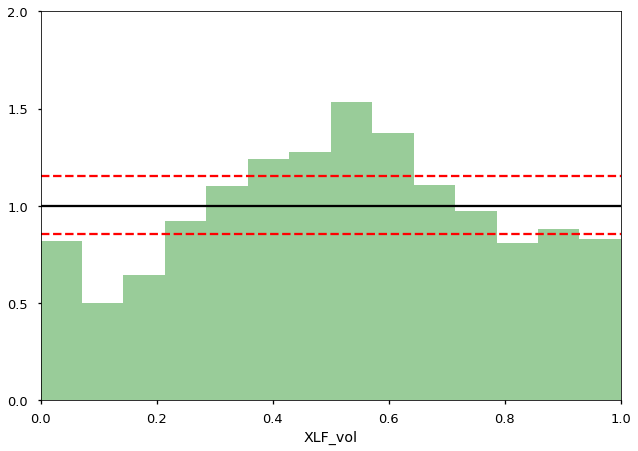

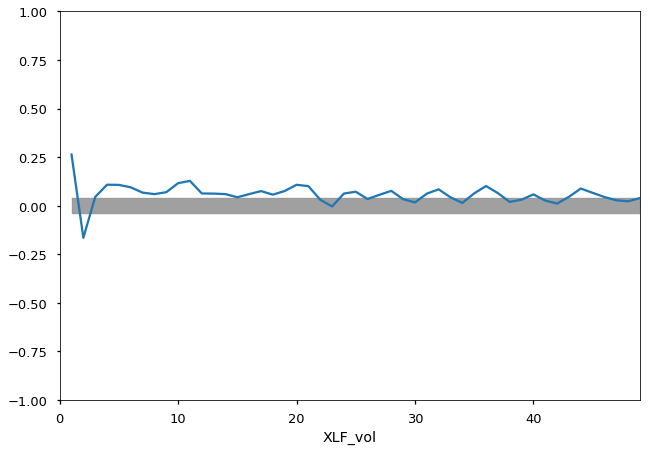

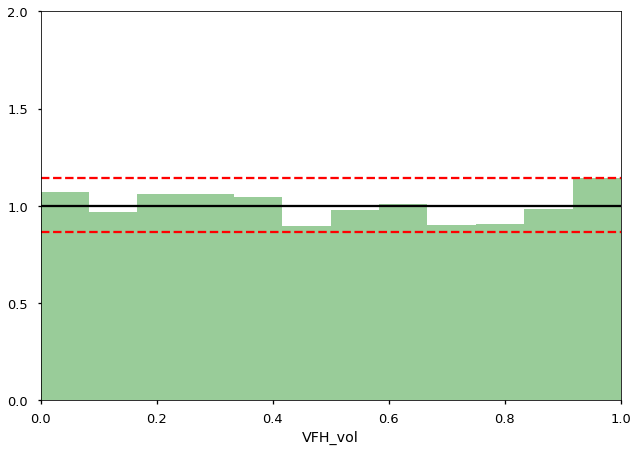

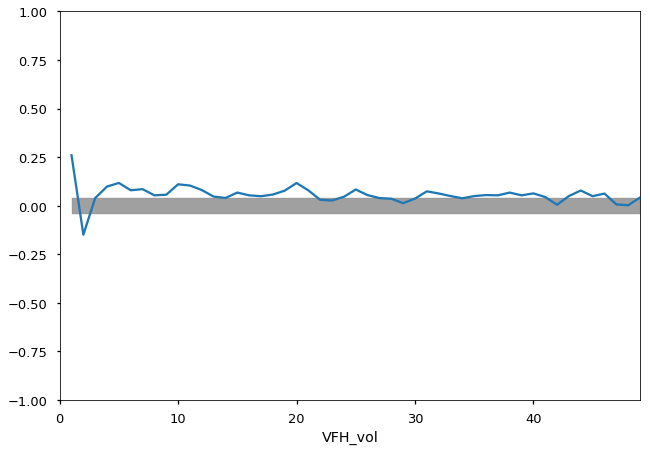

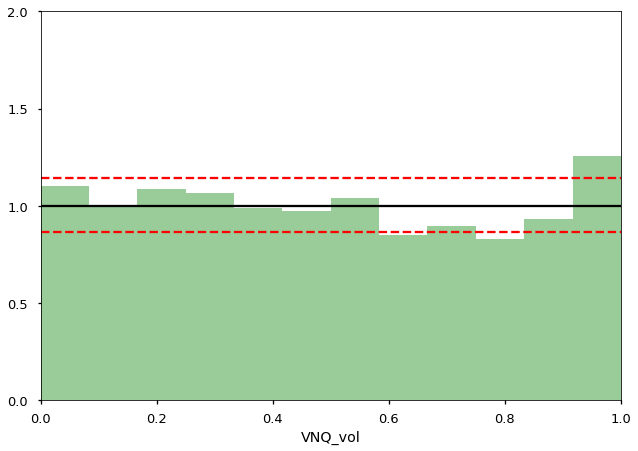

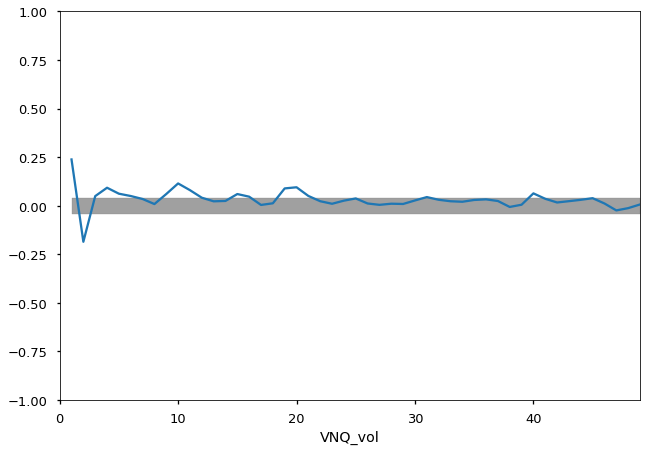

In [13]:
# ACF and PIT figure saved

for idx, val in enumerate(regressand.columns):
    estimates = pd.DataFrame(np.squeeze(np.transpose(forecast[:,:,idx])), index=data.index[2:])
    pit = mcmc.probability_integral_transform(estimates, data[val].iloc[2:])
    pit_fig, pit_ax = mpl.pyplot.subplots()
    cdpm.plot_pit(pit, ax=pit_ax, pct=.95, color='green')
    pit_ax.set_xlabel(val)
    pit_fig.savefig(f'../doc/figures/{val}_pit.tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=True,
                    frameon=False)
    
    acf_fig, acf_ax = mpl.pyplot.subplots()
    acf_ax.set_xlabel(val)
    cdpm.plot_pit_acf(pit, ax=acf_ax, color='grey', alpha=.75)
    acf_fig.savefig(f'../doc/figures/{val}_acf_mc.tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=True,
                   frameon=False)